# **Bellabeat data analysis case study by Damien**


## **Introduction**

This case study is part of the Google Data Analytics Professional Certificate course that I completed in 2024 that has the following fictive scenario:

I'm a junior data analyst working for the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat creates health-focused smart devices that collect data on physical activities, sleep, weight changes of women to help them gain knowledge about their own health and habits. I have been asked to focus on a specific Bellabeat product and analyse smart device data to gain insight into how consumers are using their smart devices. My discoveries will help guide a new marketing strategy for the company.   

## **The stakeholders**

The main stakeholders involed in this project are:

1. The founders of the company Urška Srše and Sando Mur
2. The bellabeat marketing analytics team whose mission is to collect, analyse, report the data to helps guide the marketing strategy

## **Business tasks**

This case study will focus on completing the following objectives:

* Analyse the data that was generated by Bellabeat smart devices in order to understand how their products are being used
* Identify trends using this data to help the marketing team make better marketing decisions to promote these products and find more opportunities for growth 

## **Prepare the data**

### Where is the data from?

The data used in this analysis comes from the following public dataset on kaggle:

https://www.kaggle.com/datasets/arashnic/fitbit

### How is the data organised?

The dataset is organised into two folders:

* mturkfitbit_export_3.12.16-4.11.16 
* mturkfitbit_export_4.12.16-5.12.16

Both folders combined have 2 months worth of data stored in multiple tables from March to May 2016. These tables contain information about various users such as their number of steps, their daily activities, calories burnt, numbers of hours slept, weight information. The data is stored in long format with each user ID having multiple rows 

### How was the data generated and is it reliable?

The dataset was generated by respondents to a distributed survey via “Amazon Mechanical Turk” between March and April 2016. 30 users agreed to submit their personal tracker data. However, there is not enough explanation about how the survey was carried. There's an inconsistency between the number of users that allegedly submitted their data and the number of IDs found within the dataset. While 30 unique users ID were expected, 33 were found within the dataset. For these reasons, the data doesn't appear to be very reliable.

### Is the data recent? 

As mentioned in the previous section, the data is from 2016 which makes it outdated

### Is the data comprehensive?

The dataset doesn't have any metadata providing more context about the table columns. However, a data dictionary was seperatly made giving very detailed information about each table and column. 

### Licensing concerns

The dataset uses cc0 license which means it can be used without any particular restriction. 


## **Process the data**

This section will explain various techniques to clean the data and make it usable for analysis using Excel. As mentioned previously, the dataset is split into two folders including Fitabase Data 4.12.16-5.12.16 which has the following excel documents: 

* dailyActivity_merged.csv
* dailyCalories_merged.csv
* dailyIntensities_merged.csv
* dailySteps_merged.csv
* heartrate_seconds_merged.csv
* hourlyCalories_merged.csv
* hourlyIntensities_merged.csv
* hourlySteps_merged.csv
* minuteCaloriesNarrow_merged.csv
* minuteCaloriesWide_merged.csv
* minuteIntensitiesNarrow_merged.csv
* minuteIntensitiesWide_merged.csv
* minuteMETsNarrow_merged.csv
* minuteSleep_merged.csv
* minuteStepsNarrow_merged.csv
* minuteStepsWide_merged.csv
* sleepDay_merged.csv
* weightLogInfo_merged.csv

Upon further inspection, some the tables are redudant. For instance, dailyActivity_merged.csv is a combination of dailyCalories_merged.csv,  dailyIntensities_merged.csv, dailySteps_merged.csv and dailyActivity_merged.csv. For the analysis, the focus will be on the Fitabase Data 4.12.16-5.12.16 folder that has the following tables:

* dailyActivity_merged.csv
* sleepDay_merged.csv

### dailyActivity_merged.csv table

- The dailyActivity_merged_to_clean table includes information about daily number of steps, exercice intensity and distance, calories burned from different users. 

The table contains the following columns:

* Id
* ActivityDate
* daily_steps
* total_distance
* TrackerDistance
* LoggedActivitiesDistance
* VeryActiveDistance
* ModeratelyActiveDistance
* LightActiveDistance
* SedentaryActiveDistance
* VeryActiveMinutes
* FairlyActiveMinutes
* LightlyActiveMinutes
* SedentaryMinutes
* calories_burned
   
- Using the UNIQUE function on Excel combined with COUNTIF on the ID column reveals that there are 33 unique IDs
- Some of the table names were changed for better clarity
- The table should contain data from the 12/04/2016 – 12/05/2016 or a month worth for each unique ID. It means there should be for each user ID, 31 rows, each row corresponding to a day. Using COUNTIF can help return the number of times each ID appears on the table as such:

=COUNTIF("IDs Column range", "ID value"). 

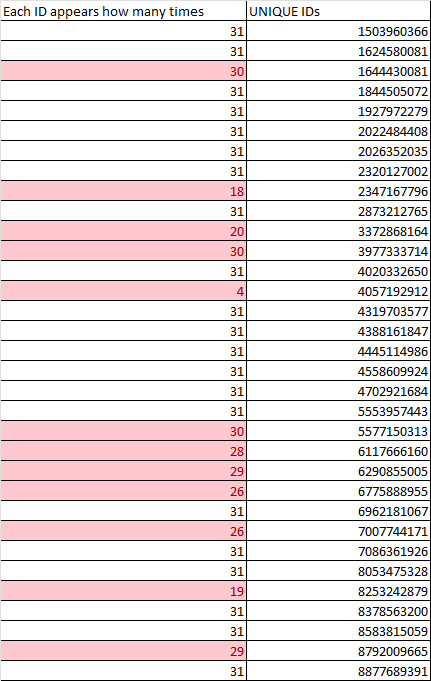

- As seen on the above image, some IDs appear less than 31 times, meaning for these IDs there's missing data. For example, 4057192912 only appears 4 times in the table. Due to the lack of data for this specific user, I deleted the 4 rows associated with it

- The ActivityDate columns should only include dates between the 12/04/2016-12/05/2016. To verify if there's any date outside of this range, the following can be done:

1. Create cells that contain a start and end date

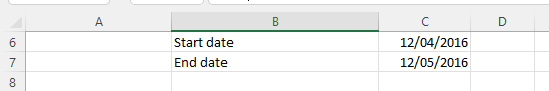

2. Create a formula that returns true if all the dates fall within the start and end date as such:

```=AND(F2:F941>=$C$6,F2:F941<=$C$7)```

- ```$C$6``` contains the start date while ```$C$7``` the end date
- Range F2:F941 corresponds to the activity date.

- The formula results in the following:



- Added an extra column day_of_the_week. =TEXT(B:B,"dddd") allows to translate each date into a day of the week. B:B refers the ActivityDate column
- Checked for duplicates and found none

###  SleepDay_Merged

- There's only 24 unique IDs in the table:

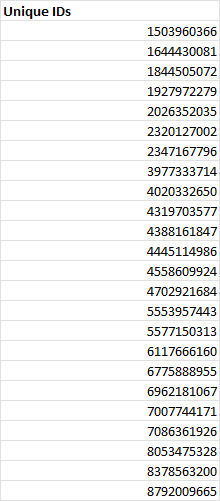

- The SleepDay column was changed to MM/DD/YYYY format
- Checked for duplicates and found none




# **Analyse the data and share the results**

This section will focus on using SQL to run queries and Tableau to create visuals based on the findings

## How many daily steps on average did the users make throughout the month ?

According to this document [1], lifestyles can be categorised into the following categories based on the number of daily steps:

1) **Under 5000 steps/day**: Sedentary lifestyle
2) **5000-7499/day**: Low active lifestyle
3) **7500-9999**: somewhat active lifestyle
4) **10,000-12,499**: active lifestyle

Let's check the average number of steps done by users via the following query:



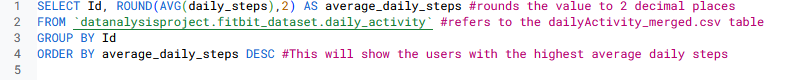

The query results are then stored in a seperate table with the name average_number_of_daily_steps_month

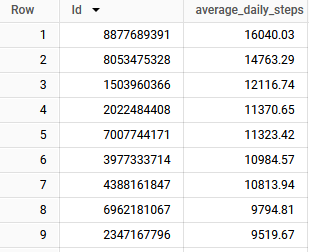

### Find the maximum and minimum values

Now, it is possible to find the minimum and maximum amount of steps using this query:

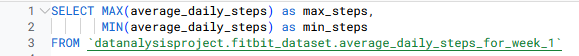

This results in the following: 

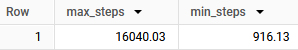

The maximum value is 16040.03 steps and minimum 916.13 steps

### Associate the number of steps with a specific lifestyle

Now let's associate for each user, a category based on their average daily steps: 

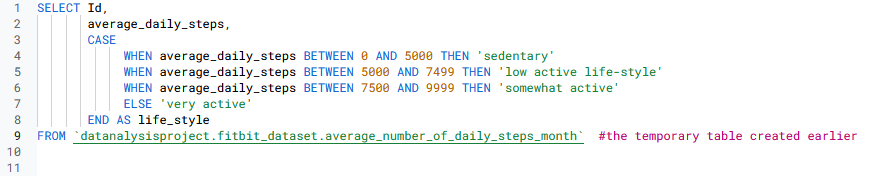

There's now a life style category associated with every user:

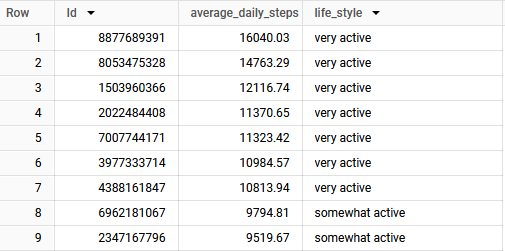

Based on the above table, let's create a visualition showing the average daily step per ID

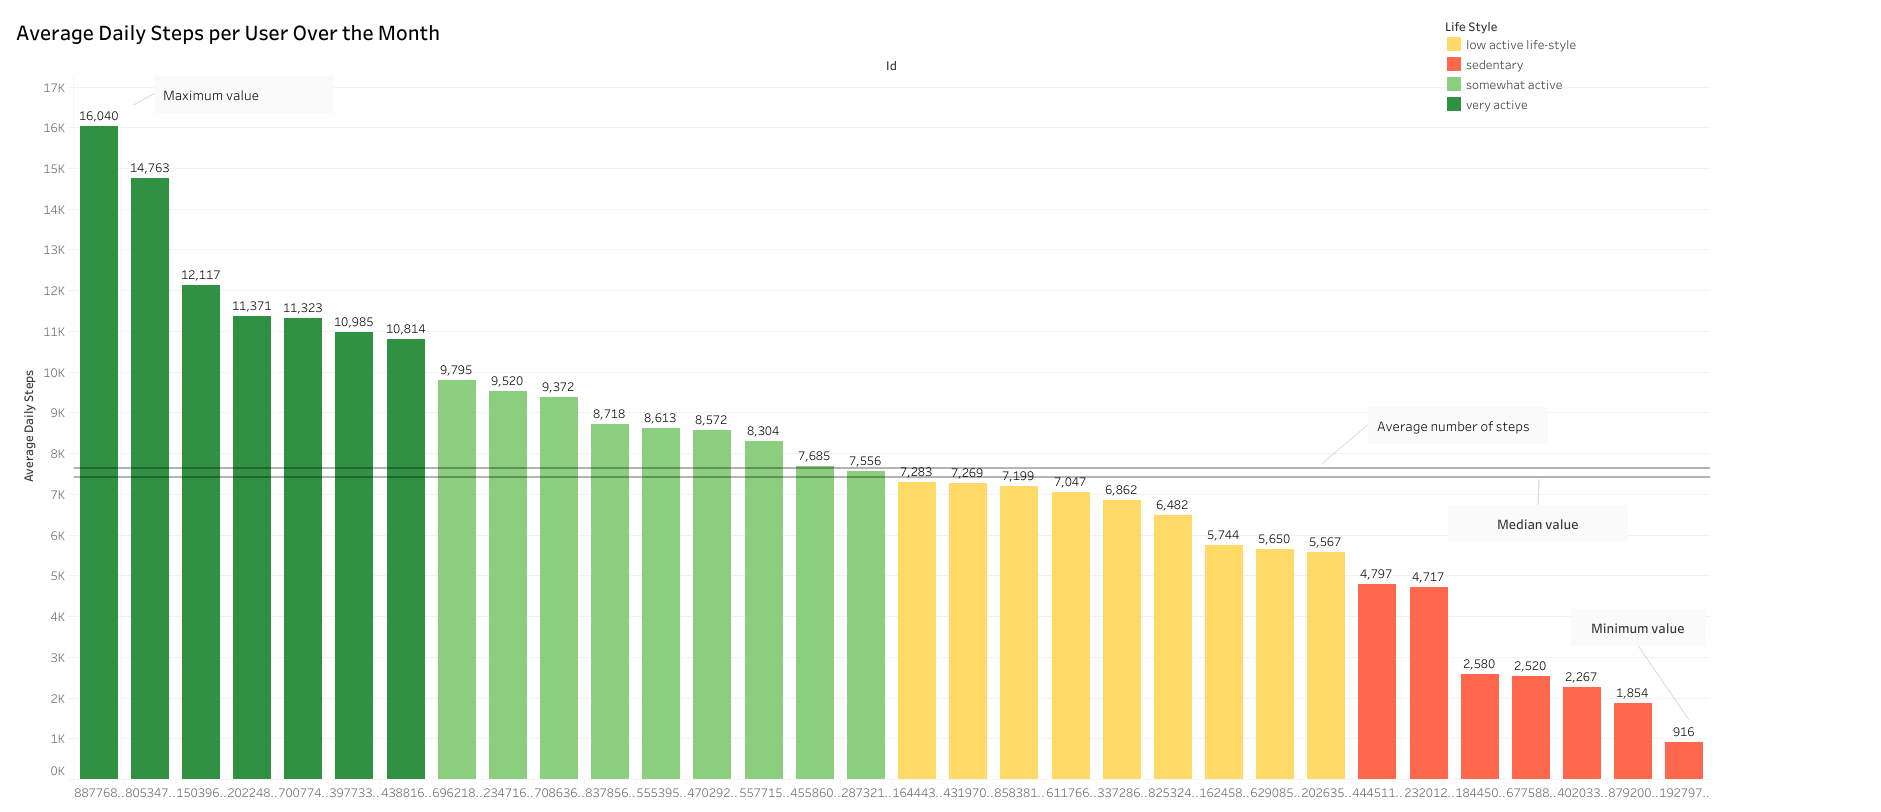

- It appears there's very little disparity between categories with some sort of uniform distribution, each of them having a similar proportion of users. 

### Show the proportion of each life style category via a pie chart

Let's run the following query:  

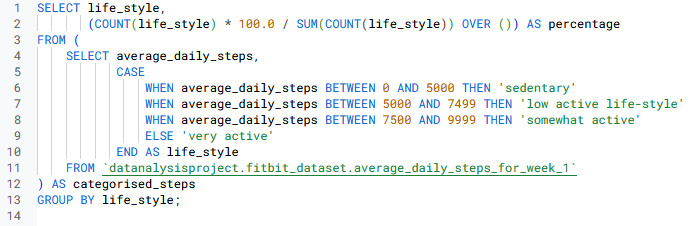

* 1) Similarly to the previous SQL query, the **inner query** will associate for each user, a category based on their average daily steps
* 2) Let's break the **outer query**:

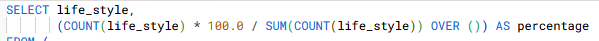

- First, the number of times each lifestyle occurs is counted and multiplied by 100. The OVER() clause  "defines a window or user-specified set of rows within a query result set”  according to this document [2]. It will perform calculations across these specified set of rows that are related to the current row. Since OVER () has no argument, it means that this window will be applied through the entire result set. It will compute the SUM of COUNTS across the entire result set which will result in the following table:

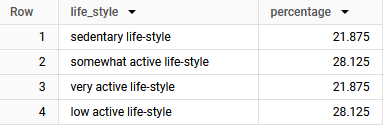

From that table, the following Pie chart is generated:

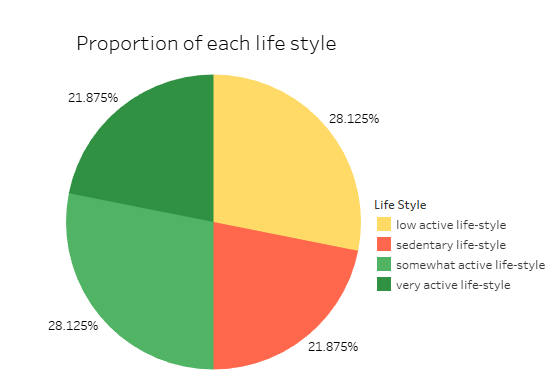

The analysis reveals that 21.875% of users were very active, while 28.125% were somewhat active, resulting in a combined total of 50% of users engaging in some level of activity. Additionally, 28.125% of users led a low-active lifestyle, and only 21.875% were considered sedentary. This indicates that nearly 80% of users demonstrated some level of activity based only on their step count.

## Is there a correlation between calories burned and daily steps?

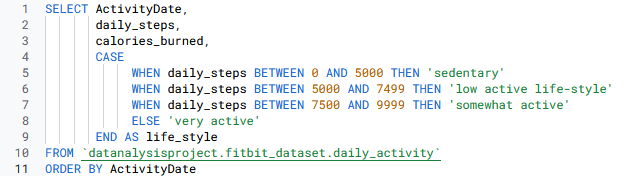

The above query generates a table that includes the activity date, the number of calories burned, and the daily step count along with its corresponding category:

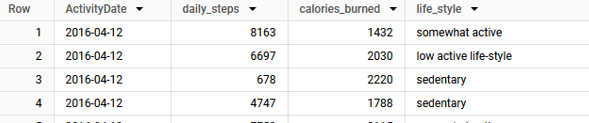

Based on that table, the following graph was created:

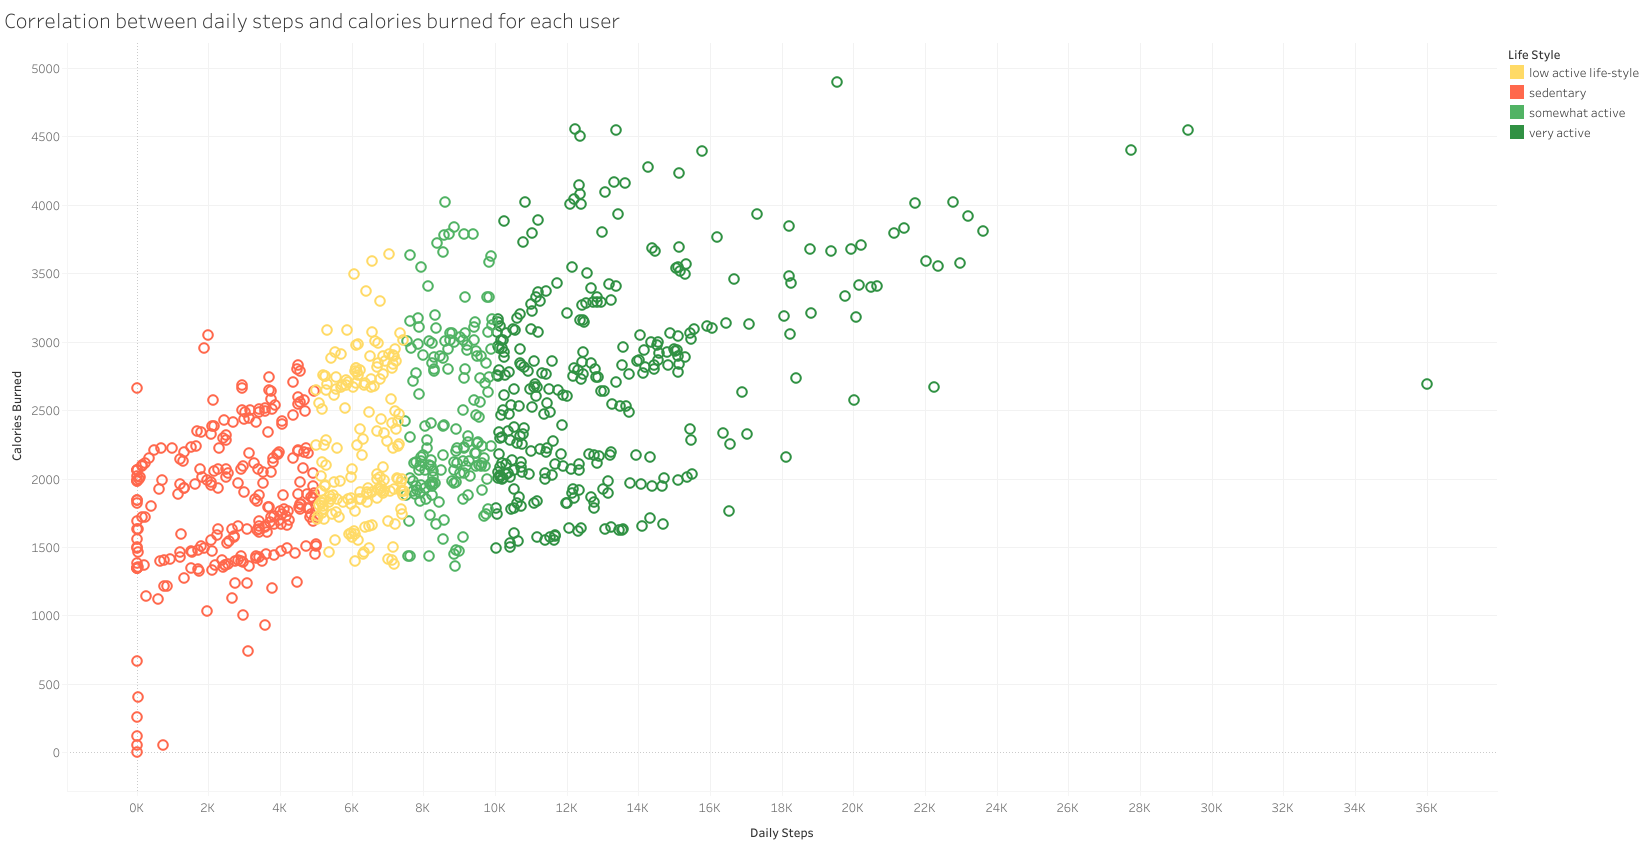

There is a positive correlation between the number of steps and calories burned, as the graph indicates that walking more steps daily generally lead to more calories burned. However, a closer look reveals that one user who walked around 22,000 steps burned approximately 4,000 calories, while another user burned the same number of calories with just 8,000 steps. This suggests that simply walking more steps does not always translate into significantly higher calorie burn. Additionally, the number of steps alone doesn't provide enough context about how they were achieved. For example, reaching the same step count through high-intensity activities would lead to burning more calories in a shorter period compared to low-intensity walking 

## Is there a correlation between high intensity exercices and calories burned? 

Let's generate a similar graph but this time, the focus will be on the number of minutes spent on high intense activities and calories burned: 

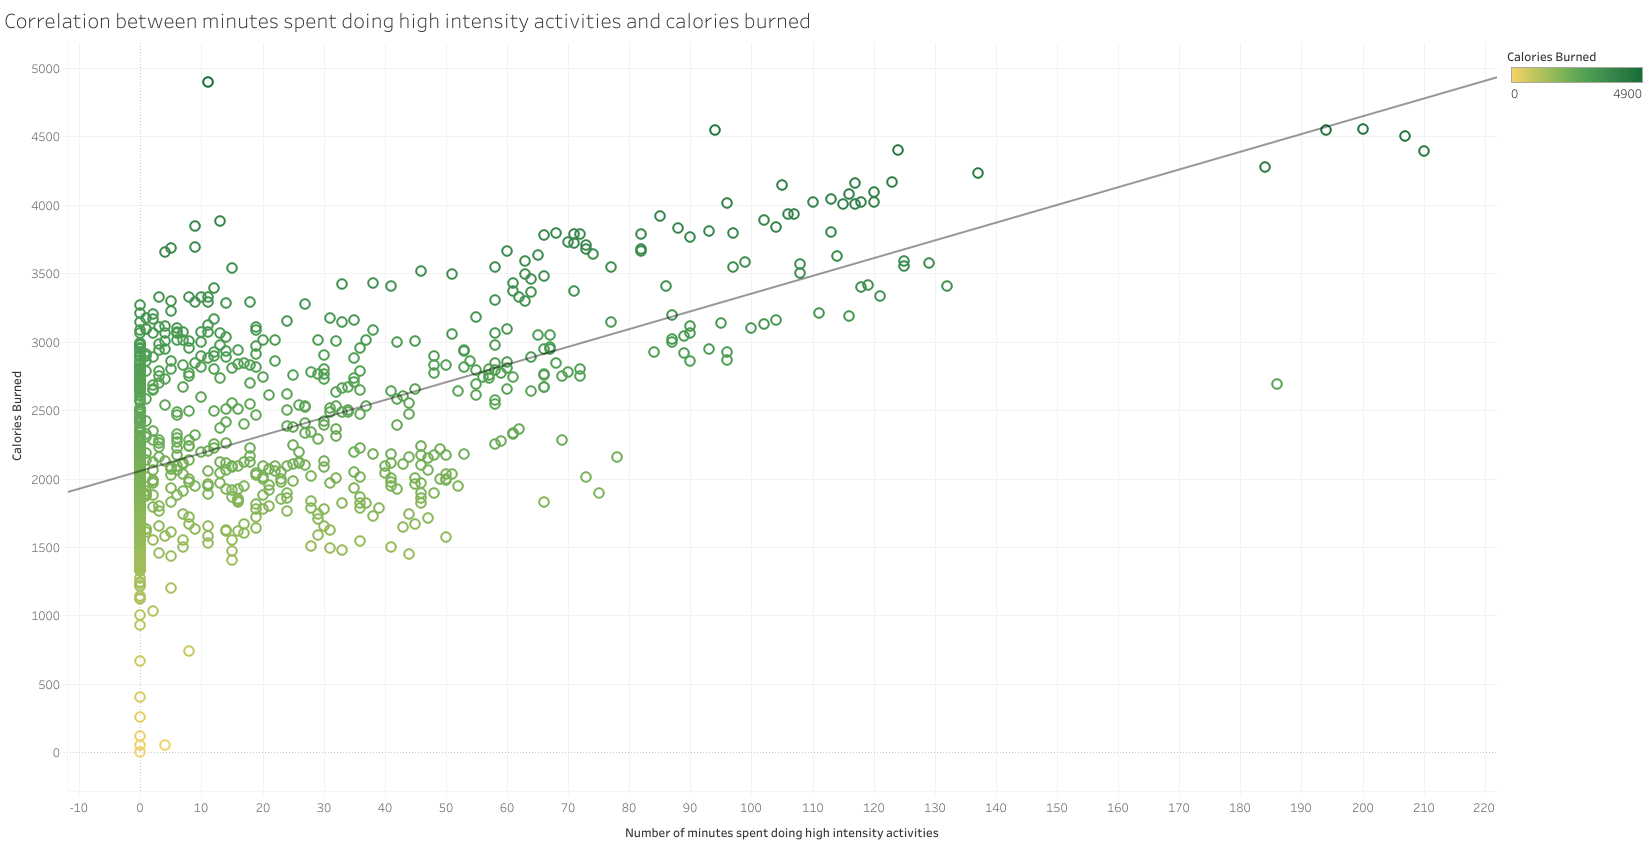

There's also a positive correlation between the number of minutes spent on high intense activities and calories burned. The graph seems to confirm the idea that spending more time on high intense activities lead to burning more calories. 

## Is there a correlation between sedentary time in minutes and calories burned? 

Let's generate a graph which will show the correlation between sedentary time in minutes and calories burned:

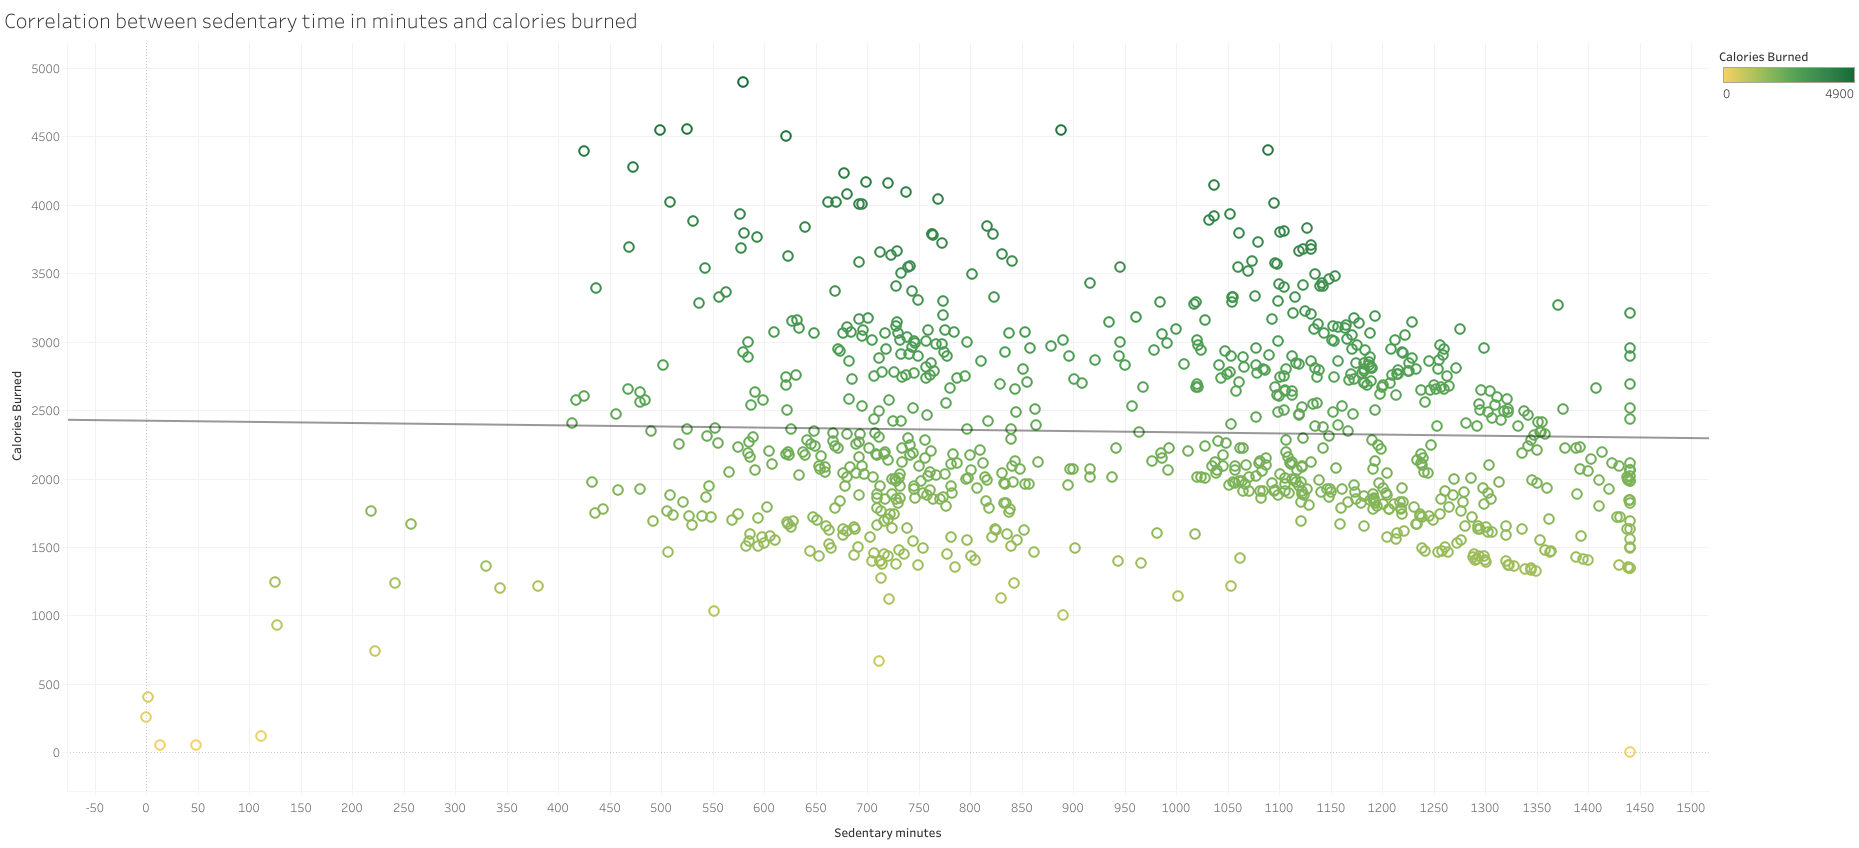

Similarly to the previous graph, there's also a positive correlation between sedentary time and calories burned. It appears that users who had the most sedentary lifestyle burned the least amount of calories. 

## What's the average amount of time in hours spent on each exercice type?

To figure out the amount of time spent on each activity type (sedentary, light-active, fairly active, very active) the following query was used: 

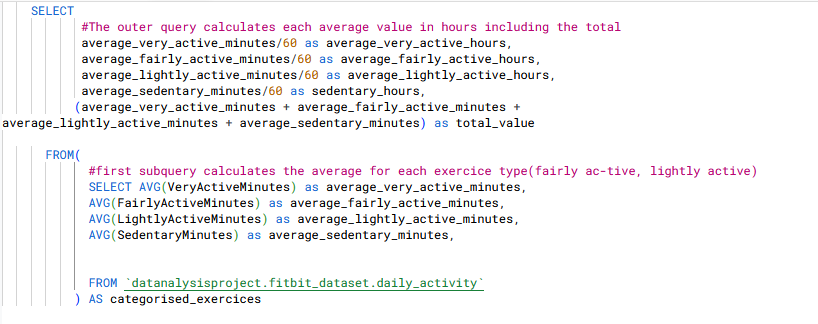

This results in the following table with the average time spent on each activity type for all users:

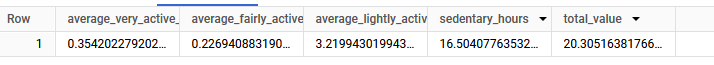

Then, we can generate the following graph based on the above data:

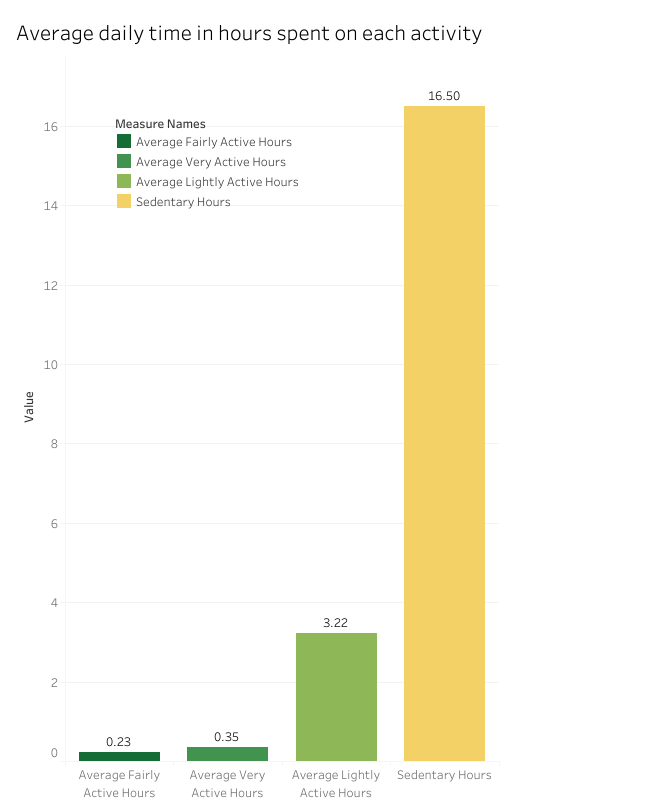

On average, users spent 3.22 hours engaged in light exercises, while the majority of their time, approximately 16.50 hours, was spent in sedentary activities. 

##  Is there a correlation between daily steps and days of the week?

Do users do more steps during certain days of the week? For example, are they most active on the weekend or during the week?  

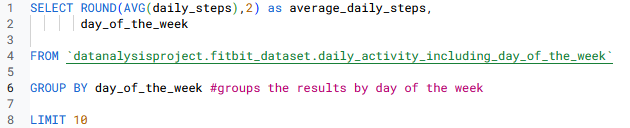

A table is generated which groups the average daily steps by day of the week:

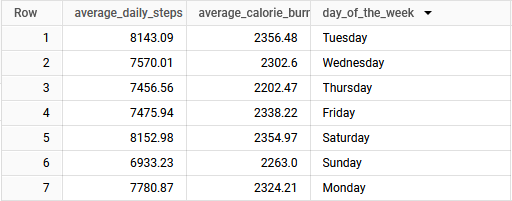

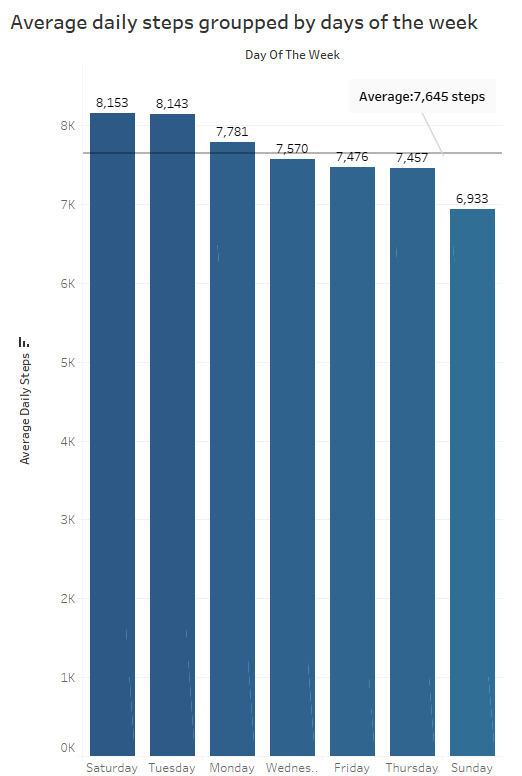

Users walked the most on Saturdays, averaging 8,153 steps, while on Sundays the average dropped to 6,933 steps. This could be due to people typically taking Sundays to relax. 

## How many hours a night do people sleep on average?

According to this document [3], “Adults should sleep 7 or more hours per night on a regular basis to promote optimal health. Sleeping less than 7 hours per night on a regular basis is associated with adverse health outcomes, including weight gain and obesity, diabetes, hypertension, heart disease and stroke, depression, and increased risk of death.”

We can get the sleep pattern of users via the following query:

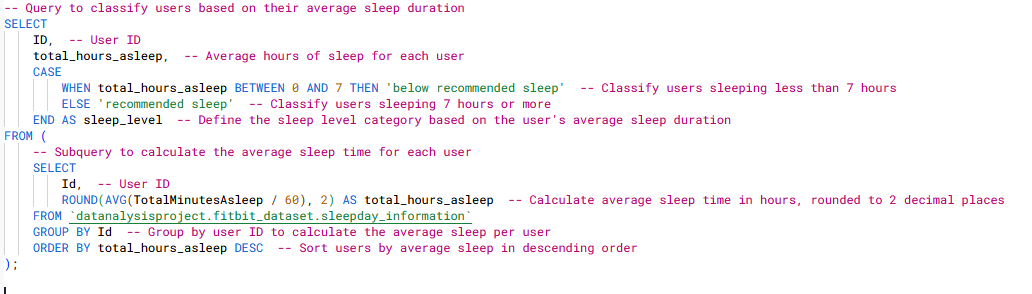

This results in the following table: 

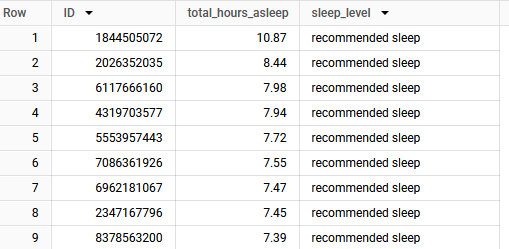

From that table, the following graph is generated:

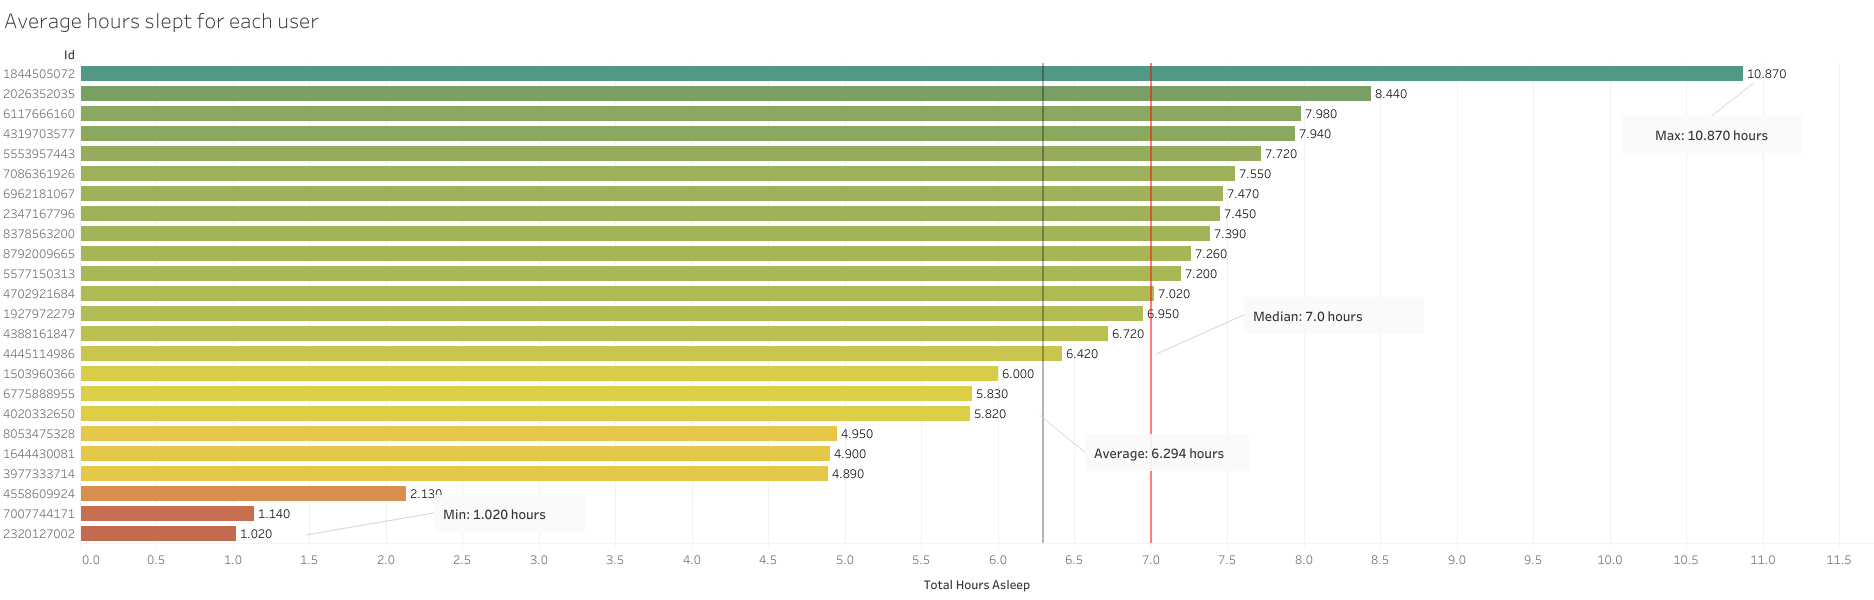

The maximum sleep duration was approximately 10.87 hours, while the minimum was around 1 hour. On average, people slept about 6.3 hours. There is a roughly equal number of people getting sufficient sleep and those who are not: 

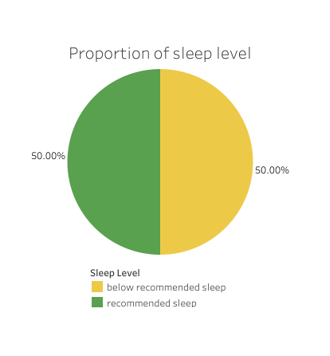




#  References

* [1] Tudor-Locke, C., Bassett, D.R. How Many Steps/Day Are Enough?. Sports Med 34, 1–8 (2004). https://doi.org/10.2165/00007256-200434010-00001
* [2] VanMSFT. OVER clause (Transact-SQL) - SQL Server [Internet]. Microsoft Learn. 2024b. Available from: https://learn.microsoft.com/en-us/sql/t-sql/queries/select-over-clause-transact-sql?view=sql-server-ver16
* [3] Watson NF, Badr MS, Belenky G, Bliwise DL, Buxton OM, Buysse D, et al. Recommended amount of sleep for a healthy adult: A joint consensus statement of the American Academy of Sleep Medicine and Sleep Research Society. Journal of Clinical Sleep Medicine [Internet]. 2015 Jun 12;11(06):591–2. Available from: https://doi.org/10.5664/jcsm.4758